In [9]:
import pickle
import os
from math import log, e, pow

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import HTML, display


In [10]:
# load the vectorizer:
with open('../model/vectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)


In [13]:
# build a dataframe with the idf (inverse document frequency) and df (document frquency)
document_frequences = pd.DataFrame({'idf' : vectorizer.idf_})
document_frequences['df'] = 784 / np.power(e, document_frequences['idf']-1)

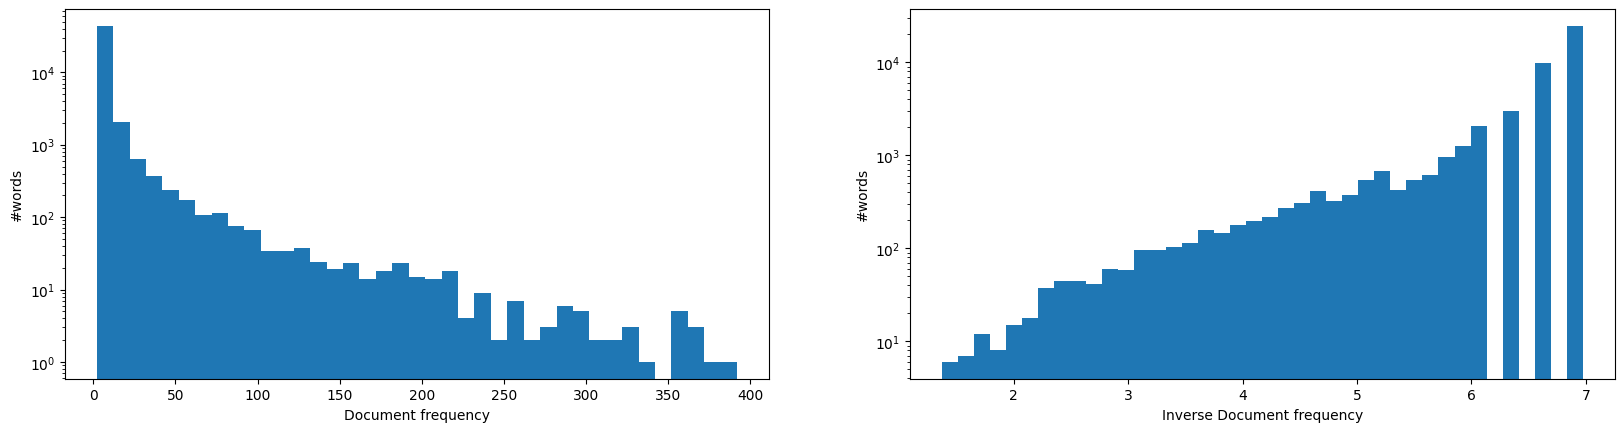

In [26]:
fig, ax  = plt.subplots(1,2)
fig.set_figwidth(20)
ax[0].set_xlabel("Document frequency")
ax[0].set_ylabel("#words")
_ = ax[0].hist(document_frequences['df'], bins=range(2,400, 10), log=True)

ax[1].set_xlabel("Inverse Document frequency")
ax[1].set_ylabel("#words")
_ = ax[1].hist(document_frequences['idf'], bins=40, log=True)
display(HTML("<h4>Histograms show the distribution of df and idf</h4>"))
display(HTML("""<div>We can see that we have a lot's of words which appaear only in a couple of documents (they have a low df and a high idf). 
             Those words are strong signals for the documents where they appear. Words with a low idf (or a higher df) are not less relevant and might be just filler words</div>"""))

In [27]:
term_idf = pd.DataFrame({'term' : vectorizer.vocabulary_.keys(), 'idf' : [vectorizer.idf_[idx] for idx in vectorizer.vocabulary_.values()]})

In [28]:
display(HTML("<h4>Example of words and the coresponding idf value</h4>"))
display(term_idf.head(5))

,term,idf
0,human,2.844127
1,dimension,5.361824
2,programm,2.876917
3,on,2.298433
4,global,2.183770


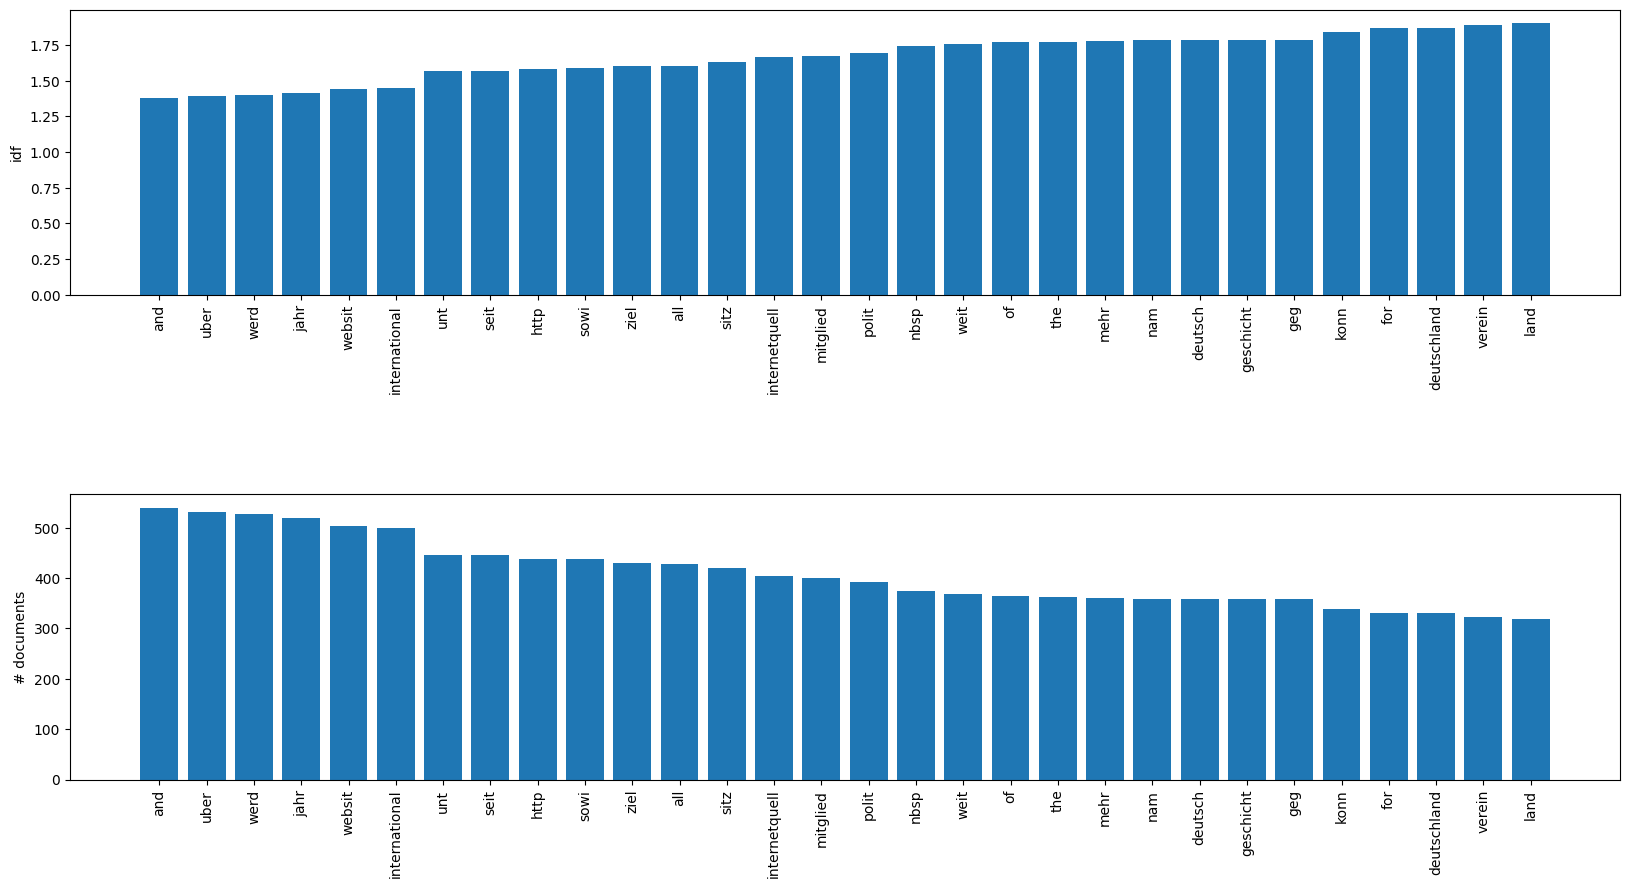

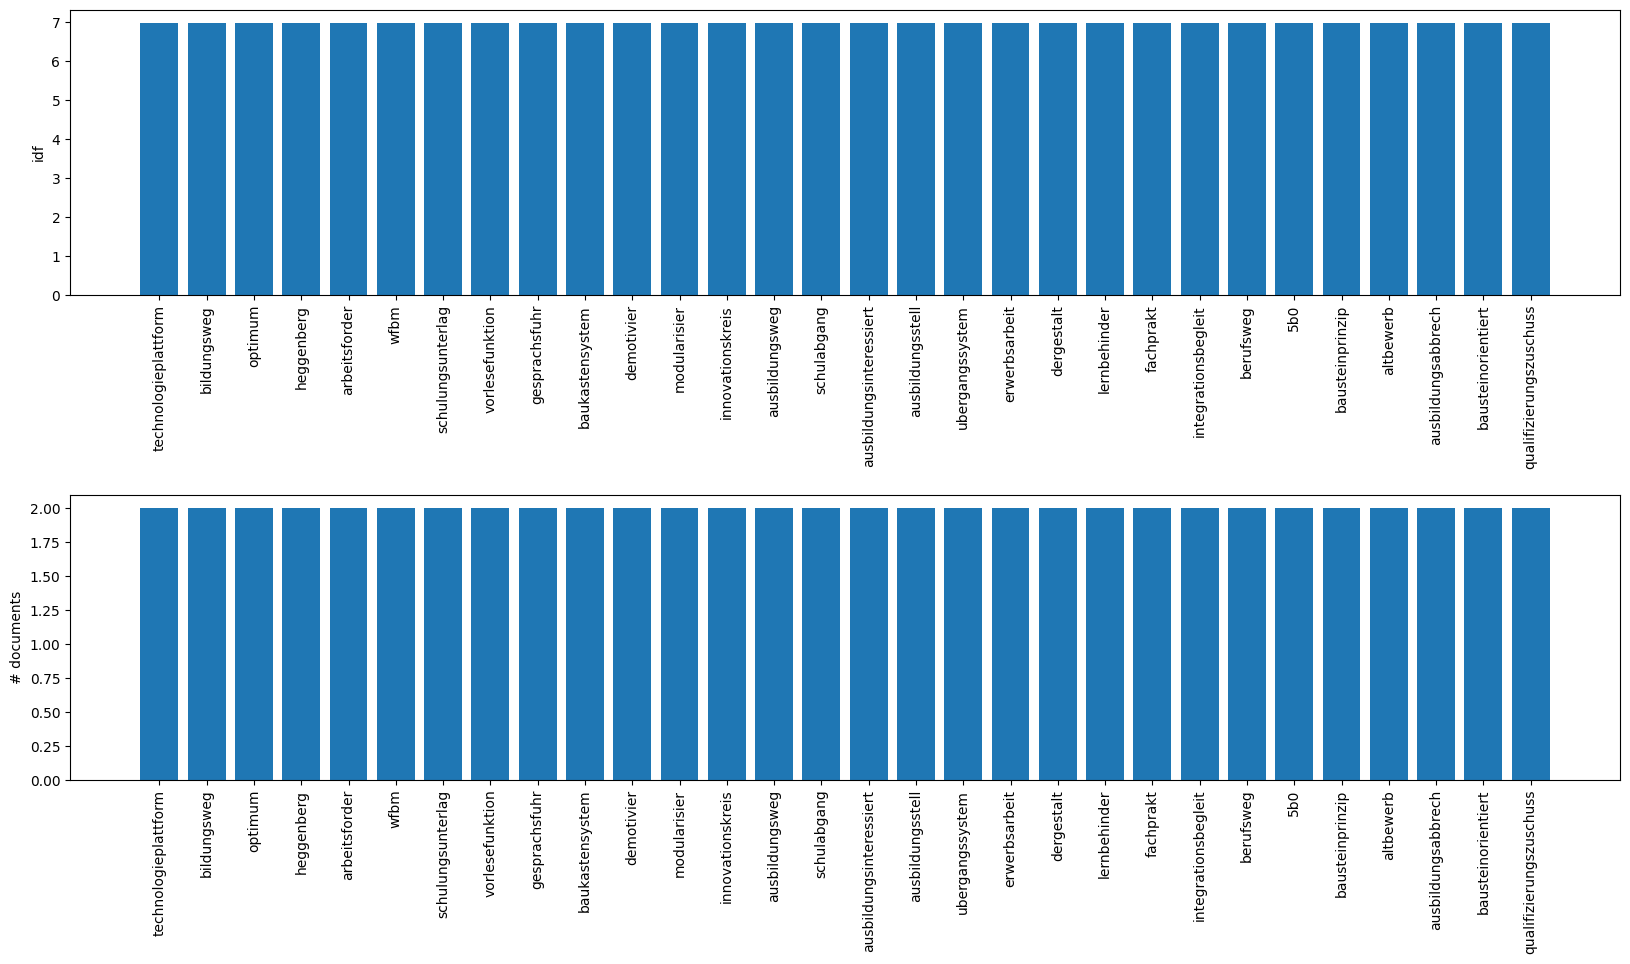

In [36]:
most_common_terms = term_idf.sort_values('idf').head(30)
least_common_terms = term_idf.sort_values('idf', ascending=False).head(30)

# calculate the number of documents it appeared
# inverse the idf formular from https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting

def plot_idf(df):
    df['num_doc_occ'] = 784 / np.power(e, df['idf']-1)

    fig, ax = plt.subplots(2)
    fig.set_figwidth(20)
    plt.subplots_adjust(hspace=0.7)

    fig.set_figheight(10)
    
    ax[0].set_xticks(range(df.shape[0]))
    ax[1].set_xticks(range(df.shape[0]))
    ax[0].set_xticklabels(df['term'], rotation=90)
    ax[1].set_xticklabels(df['term'], rotation=90)
    
    ax[0].set_ylabel('idf')
    ax[1].set_ylabel('# documents')
    
    
    ax[0].bar(x=df['term'], height=df['idf'])
    ax[1].bar(x=df['term'], height=df['num_doc_occ'])
    display(fig)
    plt.close()

display(HTML(f'<h2>The {most_common_terms.shape[0]} most common words</h2>'))
display(HTML(f'''<p>Below you can find the most common words and the coresponding idf and df values. You can see some english stop words and terms like <i>international</i> or 
             <i>mitglied</i>which are pretty common for any kind of organisation</p>'''))
plot_idf(most_common_terms )
display(HTML(f'<h2>The {most_common_terms.shape[0]} least common words</h2>'))
display(HTML(f'<p>Below you can find the least common words and the coresponding idf and df values. Please note that we have over 10.000 words which appear in just 2 documents.</p>'))
plot_idf(least_common_terms)